### Normal distribution

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np

data = pd.read_table("student-mat.csv",sep=";",header=0)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
mean = 0
std = 0

for i in data["G1"]:
    mean += i
mean /= len(data["G1"])

for i in data["G1"]:
    std += (mean - i) ** 2
std /= len(data["G1"])
std = math.sqrt(std)
# print(type(data["G1"]))
print(mean, std ** 2, std)

# print(math.sqrt(std)** 2)

10.90886075949367 10.989161993270306 3.314990496708898


Text(0, 0.5, 'Probability Density')

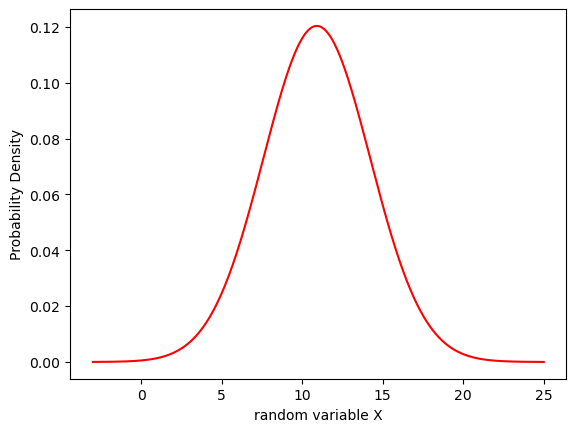

In [6]:
# normal distribution 설계 및 시각화
def normal_distribution(x, mean, std):
    y = []
    for i in x:
        y_ = math.exp(-(i-mean )** 2 / (2 * std ** 2)) / (math.sqrt(2 * math.pi) * std)
        y.append(y_)
    return y
    # return math.exp(-(x-mean )** 2 / (2 * std ** 2)) / (math.sqrt(2 * math.pi) * std)


x = np.linspace(-3,25,1000)
pdf = normal_distribution(x,mean,std)
plt.plot(x, pdf , color = 'red')
plt.xlabel('random variable X')
plt.ylabel('Probability Density')

### Approximating normal with binomial

Text(0, 0.5, 'Probability Density')

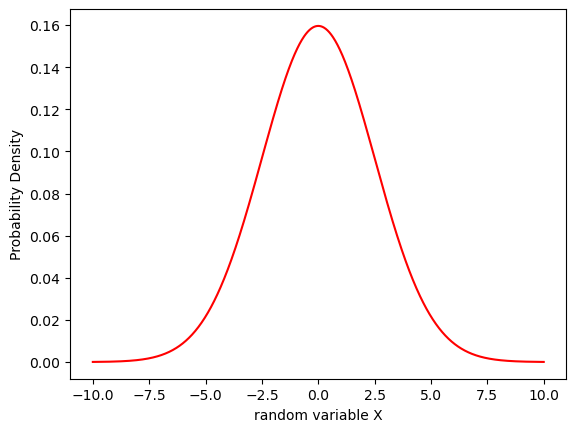

In [7]:
x = np.linspace(-10,10,1000)
# print(x)
mean = 0
std = 2.5
pdf = normal_distribution(x,mean,std)

plt.plot(x, pdf , color = 'red')
plt.xlabel('random variable X')
plt.ylabel('Probability Density')

In [8]:
import random

def next_action(p, step):
    if random.uniform(0, 1) < p:
        return -step
    else:
        return step

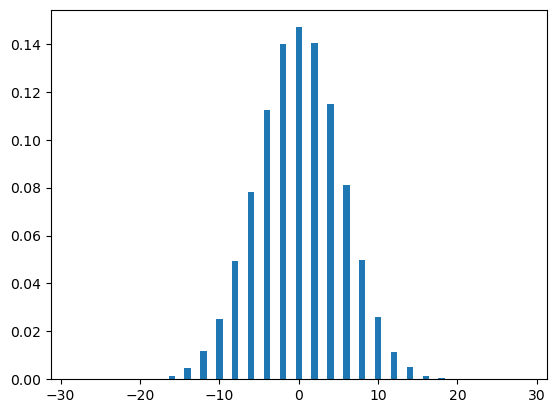

In [70]:
#step이 각각 -step와 step일 경우

# 코드를 완성하시오. (변수 추가 및 수정 가능)

trial = 100_000 # 구슬 개수 (최대 100,000)
score = 1/trial 
step = 1 # 층당 이동 거리
p = 0.5
floor = 28 # 층 개수 // 가능한 칸의 개수는 2 ** 30
# next_action을 취한 이후 floor 더해주기
"""
마지막 칸의 값은 2 ** (floor) - 1
"""
# x_range = floor + 1
y_range = [0] * (2 * floor * step + 1)
for _ in range(trial):
    current = 0
    for __ in range(floor):
        current += next_action(p, step)
    y_range[current + floor * step] += score
    # print(_)

# print(y_range)

# PMF_x = [] # 값 채워서 반환
# PMF_y = []

PMF_x = np.array(range(-floor * step, floor * step + 1, 1))
# print(PMF_x)
PMF_y = y_range

plt.bar(PMF_x, PMF_y)
plt.show()

In [ ]:
#step을 0과 1로 두고 푼 경우
# 층이 1개일 때 선택지가 2개, 2개 일때 3개 ---- 이와 같은 조건을 만족하기 위해서는 step를 0와 1로 두고 풀어도 된다.

import random

def next_action(p, step):
    if random.uniform(0, 1) < p:
        return 0
    else:
        return step

# 코드를 완성하시오. (변수 추가 및 수정 가능)
trial = 100_000 # 구슬 개수 (최대 100,000)
score = 1/trial 
step = 1 # 층당 이동 거리
p = 0.5
floor = 30 # 층 개수 // 가능한 칸의 개수는 2 ** 30
# next_action을 취한 이후 floor 더해주기
"""
마지막 칸의 값은 2 ** (floor) - 1
"""
# x_range = floor + 1
PMF_x = np.array(range(-floor * step , floor * step + 1))
y_range = [0] * (floor * step * 2 + 1)
for _ in range(trial):
    current = 0
    for __ in range(floor):
        current += next_action(p, step)
    y_range[current + int(p * floor)] += score
    # print(_)

# print(y_range)

# PMF_x = [] # 값 채워서 반환
# PMF_y = []


# print(PMF_x)

PMF_y = y_range

# print(len(PMF_x))
# print(len(PMF_y))

plt.bar(PMF_x, PMF_y)
plt.show()


error:  0.09867979256536906


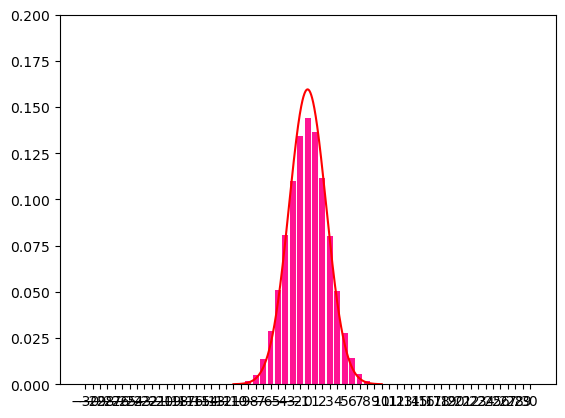

In [83]:
total_prob = sum(PMF_y)

def normal_distribution(x, mean, std):
    return math.exp(-(x-mean )** 2 / (2 * std ** 2)) / (math.sqrt(2 * math.pi) * std)

def cal_error(result_x, result_y):
    mean = 0
    std = 2.5
    error = 0
    for i in range(len(result_x)):
        error += abs(normal_distribution(result_x[i], mean, std)-result_y[i])
    print('error: ', error)

if abs(1-total_prob) > 0.0001 :
    print("확률의 총합이 1이 되지 않습니다")
else:
    cal_error(PMF_x, PMF_y)
    plt.bar(PMF_x, PMF_y, color='deeppink')
    plt.plot(x,pdf , color = 'red')
    plt.xticks(PMF_x)
    plt.ylim(min(PMF_y), 0.2)
    plt.show()

# 고찰
층을 통과할 때마다 step와 -step로 주는 경우와 통과할 때 0과 step로 통과하는 경우 2가지로 문제에 접근했습니다.
전자의 경우로는 error값을 줄이는데 어려움을 겪었습니다. 하지만 후자의 경우로 문제에 접근할 때는 error값이 크게 주는 것을 확인할 수 있었습니다. 
다만 x의 범위에 따른 y값을 설정하는 것에서 시간이 걸렸고, 이것을 해결한 이후에는 문제를 풀 수 있었습니다.